# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### Understanding the data

In [2]:
df = pd.read_csv('Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
col=df.columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
a=df["TotalCharges"]
a0=a[a==0]
a0

Series([], Name: TotalCharges, dtype: object)

In [8]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",0)
a=df["TotalCharges"]
a0=a[a==0]
a0

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: TotalCharges, dtype: object

### Data Manipulation

In [9]:
df["TotalCharges"] = df["TotalCharges"].astype(float)
m=np.mean(df["TotalCharges"])
df['TotalCharges'] = df["TotalCharges"].replace(0,m)
def tenure(df) :
    if df["tenure"] <= 12 :
        return "0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "48-60"
    elif df["tenure"] > 60 :
        return "more than 60"
df["tenure_group"] = df.apply(lambda df:tenure(df),axis = 1)

In [10]:
wiu=df[df["InternetService"]=="No"]
w_internet_user=wiu[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines','PaymentMethod','MonthlyCharges', 'TotalCharges',"tenure_group", 'Churn']]

In [11]:
internetUser=df[df["InternetService"]!="No"]
i_churner     = internetUser[internetUser["Churn"] == "Yes"]
i_not_churner = internetUser[internetUser["Churn"] == "No"]
w_i_churner     = w_internet_user[w_internet_user["Churn"] == "Yes"]
w_i_not_churner = w_internet_user[w_internet_user["Churn"] == "No"]
names='Churner','Non-Churner',
size=[i_churner.count()[0],i_not_churner.count()[0]]
w_names='Churner','Non-Churner',
w_size=[w_i_churner.count()[0],w_i_not_churner.count()[0]] 


### Data Visualization

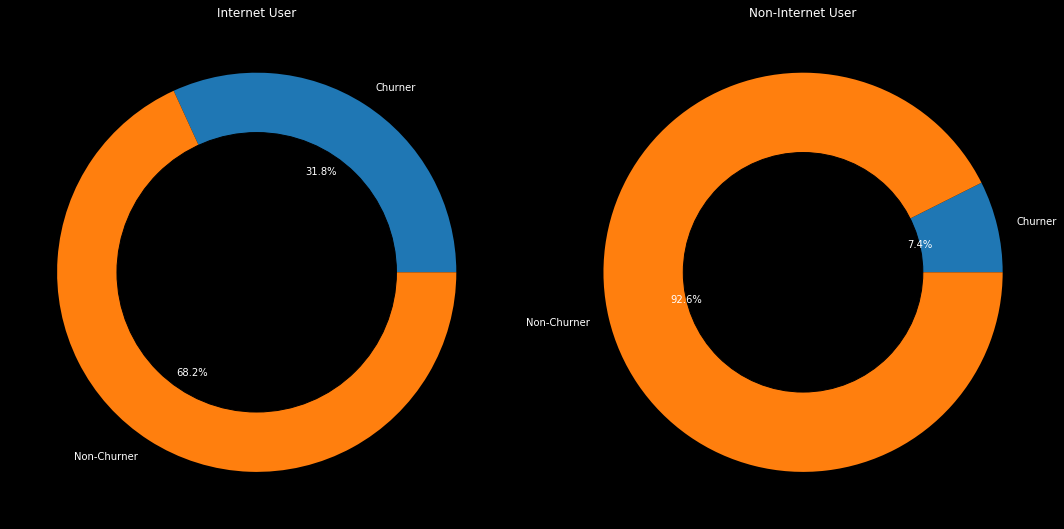

In [12]:
# create a figure and set different background
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('black')
# Change color of text
plt.rcParams['text.color'] = 'white'
 
a=plt.subplot(1,2,1)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
# Pieplot + circle on it
plt.pie(size, labels=names,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
a.set_title("Internet User")

b=plt.subplot(1,2,2)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='black')
plt.pie(w_size, labels=w_names,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
b.set_title("Non-Internet User")
plt.tight_layout()
plt.show()
#plt.show()

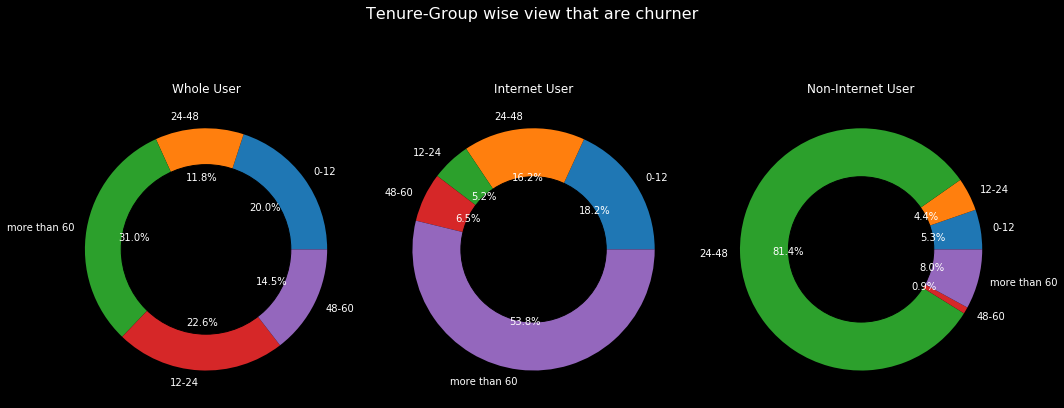

In [13]:
# Data
k=df["tenure_group"].value_counts().keys()
v=df["tenure_group"].value_counts().value_counts().keys()

ki=i_churner["tenure_group"].value_counts().keys()
vi=i_churner["tenure_group"].value_counts().value_counts().keys()

kw=w_i_churner["tenure_group"].value_counts().keys()
vw=w_i_churner["tenure_group"].value_counts().value_counts().keys()

# create a figure and set different background
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('black')
# Change color of text
plt.rcParams['text.color'] = 'white'
 
a=plt.subplot(1,3,1)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
# Pieplot + circle on it
plt.pie(v, labels=k,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
a.set_title("Whole User")

b=plt.subplot(1,3,2)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='black')
plt.pie(vi, labels=ki,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
b.set_title("Internet User")

b=plt.subplot(1,3,3)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='black')
plt.pie(vw, labels=kw,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
b.set_title("Non-Internet User")
plt.tight_layout()
plt.suptitle("Tenure-Group wise view that are churner",fontsize=16)
plt.subplots_adjust(top=1.5)
plt.show()
#plt.show()

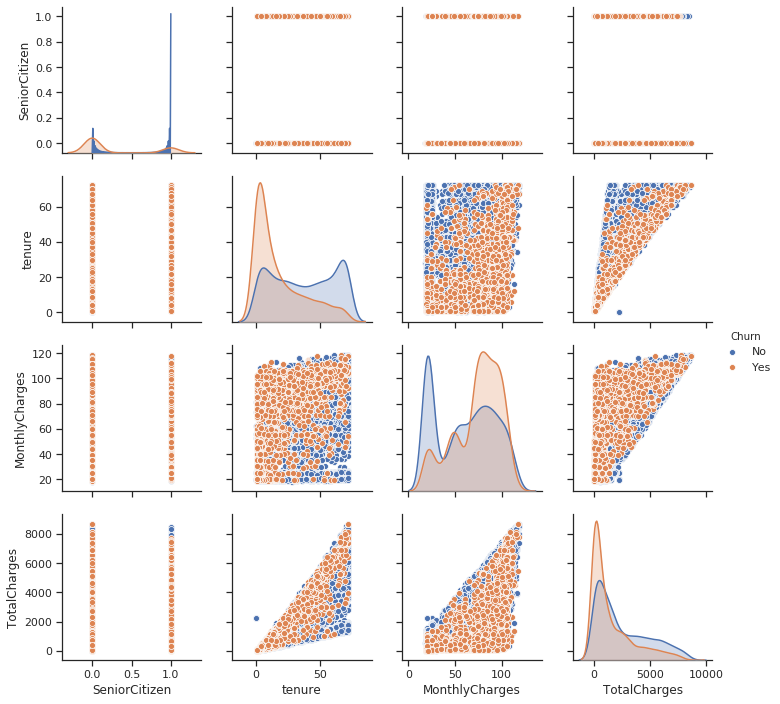

In [14]:
sns.set(style="ticks")
sns.pairplot(df, hue="Churn")

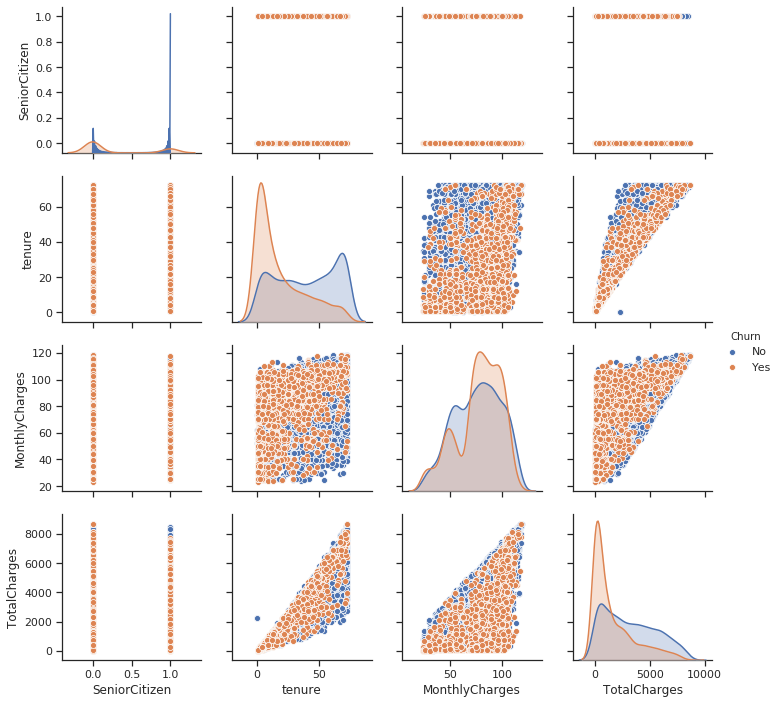

In [15]:
sns.set(style="ticks")
sns.pairplot(internetUser,hue="Churn")

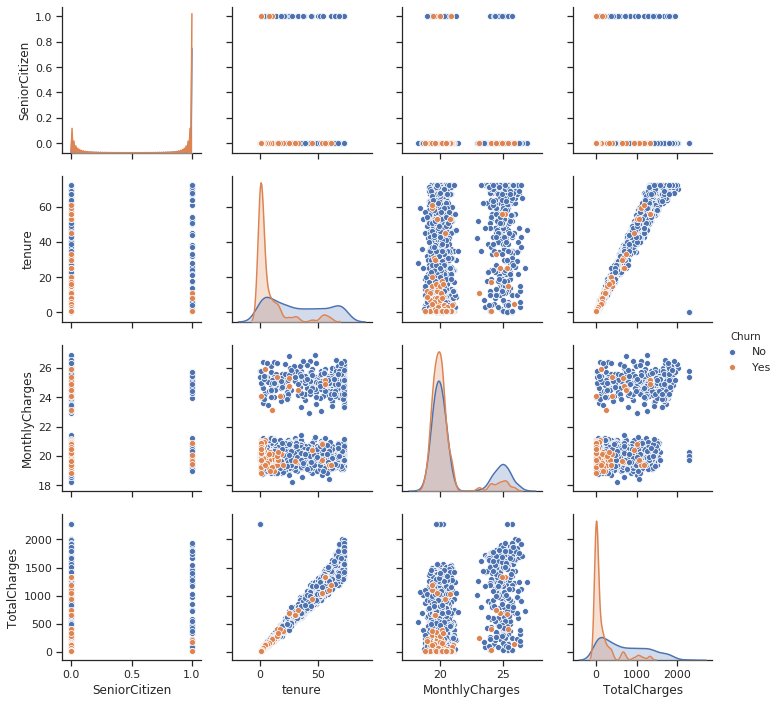

In [16]:
sns.set(style="ticks")
sns.pairplot(w_internet_user, hue="Churn")

In [17]:
i=pd.get_dummies(internetUser.InternetService)
p=pd.get_dummies(internetUser.PaymentMethod)
c=pd.get_dummies(internetUser.Contract)
internetUser

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,more than 60
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12


In [18]:
internetUser=pd.concat([internetUser,i,p,c],axis='columns')
internetUser=internetUser.drop(["InternetService","PaymentMethod","Contract"],axis="columns")
le=LabelEncoder()
cat=["gender","Partner","Dependents","tenure","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling','MultipleLines']
for c in cat:
    internetUser[c]=le.fit_transform(internetUser[c])
num=["TotalCharges","MonthlyCharges"]
internetUser.iloc[0]

customerID                   7590-VHVEG
gender                                0
SeniorCitizen                         0
Partner                               1
Dependents                            0
tenure                                1
PhoneService                          0
MultipleLines                         1
OnlineSecurity                        0
OnlineBackup                          1
DeviceProtection                      0
TechSupport                           0
StreamingTV                           0
StreamingMovies                       0
PaperlessBilling                      1
MonthlyCharges                    29.85
TotalCharges                      29.85
Churn                                No
tenure_group                       0-12
DSL                                   1
Fiber optic                           0
Bank transfer (automatic)             0
Credit card (automatic)               0
Electronic check                      1
Mailed check                          0


In [19]:
internetUser=internetUser.drop(["tenure_group"],axis=1)
internetUser["Churn"]=le.fit_transform(internetUser["Churn"])
internetUser=internetUser.drop(["customerID"],axis=1)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(internetUser)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, internetUser[['Churn']]], axis = 1)

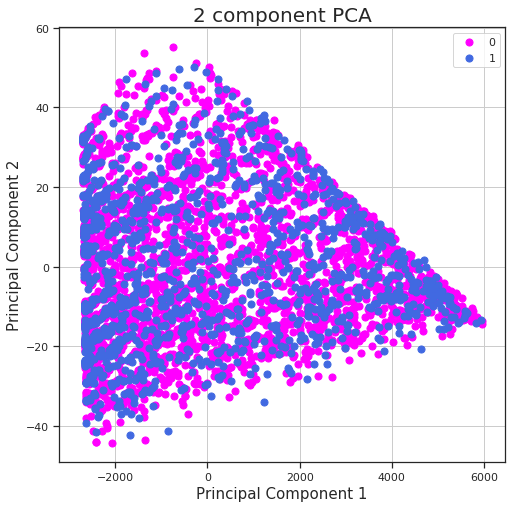

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['magenta', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#splitting train and test data 
train,test = train_test_split(internetUser,test_size = .20 ,random_state = 123)
    
##seperating dependent and independent variables
cols=internetUser.columns.tolist()
cols.remove("Churn")
train_X = train[cols]
train_Y = train["Churn"]
test_X  = test[cols]
test_Y  = test["Churn"]
#logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
 #         verbose=0, warm_start=False)
logit=LogisticRegression(random_state=1,solver='lbfgs',max_iter=6000,C=1.72,verbose=1,fit_intercept=False,multi_class='ovr',tol=0.001)  

In [23]:
logit

LogisticRegression(C=1.72, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=6000,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.001, verbose=1, warm_start=False)

In [24]:
logit=LogisticRegression(random_state=1,solver='lbfgs',max_iter=8000,C=1.7,verbose=3,fit_intercept=False,multi_class='ovr',tol=0.00001)
logit.fit(train_X,train_Y)
y=logit.predict(train_X)
predictions   = logit.predict(test_X)
probabilities = logit.predict_proba(test_X)
print ("\n Classification report : \n",classification_report(test_Y,predictions))
print ("Accuracy   Score : ",accuracy_score(test_Y,predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       772
           1       0.65      0.60      0.63       332

    accuracy                           0.78      1104
   macro avg       0.74      0.73      0.74      1104
weighted avg       0.78      0.78      0.78      1104

Accuracy   Score :  0.7844202898550725


In [25]:
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.15,
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=0.5, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=1, verbosity=1)
model.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.15,
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=0.5, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=1, verbosity=1)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint,uniform
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
seed =13
np.random.seed(seed)
#X,y=make_classification(n_samples=1000,n_features=20,n_informative=8,n_redundant=3,n_repeated=2,random_state=seed)
cv=StratifiedKFold(n_splits=20,shuffle=True,random_state=seed)
params_grid={'max_depth':[1,2,3,4,5],'n_estimators':[5,10,20,25,50],'learning_rate':np.linspace(1e-16,1,3)}
params_fixed={'objectives':'binary:logistic','silver':1}
bst_grid=GridSearchCV(estimator=XGBClassifier(**params_fixed,seed=seed),param_grid=params_grid,cv=cv,scoring='accuracy')
bst_grid.fit(train_X,train_Y)
print("best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters : ")
for key,value in bst_grid.best_params_.items():
    print("\t{}: {}".format(key,value))

best accuracy obtained: 0.7709041468388851
Parameters : 
	learning_rate: 0.5
	max_depth: 1
	n_estimators: 50


In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_X, train_Y);

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_X)# Calculate the absolute errors
errors = abs(predictions - test_Y)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [29]:
for i in range(len(predictions)):
    if predictions[i]>=.5:       # setting threshold to .5
       predictions[i]=1
    else:  
       predictions[i]=0

In [30]:
accuracy_score(predictions,test_Y)

0.7644927536231884

In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)# Train the model on training data
rf.fit(train_X, train_Y);

In [32]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_X)# Calculate the absolute errors
errors = abs(predictions - test_Y)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.22 degrees.


In [33]:
accuracy_score(predictions,test_Y)

0.779891304347826

In [34]:
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                       bootstrap=True, oob_score=False, n_jobs=None, random_state=100, verbose=0,
                       warm_start=False, class_weight=None)

In [35]:
rf.fit(train_X, train_Y);
# Use the forest's predict method on the test data
predictions = rf.predict(test_X)# Calculate the absolute errors
errors = abs(predictions - test_Y)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.22 degrees.


In [36]:
accuracy_score(predictions,test_Y)

0.7780797101449275

In [37]:
from sklearn.model_selection  import GridSearchCV,KFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=40, oob_score = True) 
param_grid = { 
    'n_estimators': [100,200,300,500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_X, train_Y)
print(CV_rfc.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [38]:
from sklearn.model_selection  import cross_val_score
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True) 
kfold=KFold(n_splits=10,random_state=120)
results=cross_val_score(rfc,train_X,train_Y,cv=kfold)

In [39]:
results

array([0.74886878, 0.73529412, 0.75113122, 0.71428571, 0.74829932,
       0.76643991, 0.75510204, 0.76417234, 0.75283447, 0.71882086])

In [40]:
predictions = CV_rfc.predict(train_X)
accuracy_score(predictions,train_Y)

0.9993201903467029

In [41]:
predictions = CV_rfc.predict(test_X)
accuracy_score(predictions,test_Y)

0.7789855072463768